In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pr
from scipy import signal

In [2]:
dataset_path = "./dataset/inputs/"

indice = pd.read_csv(dataset_path + "hm_ARVI.csv")
meteo = pd.read_csv(dataset_path + "hm_tempPrecip.csv")

In [3]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__FILE__"), "utils"))

In [4]:
from functions import *

In [5]:
indice.head()

,system:time_start,ARVI
0,"Jan 8, 2018",1.317
1,"Jan 9, 2018",0.954
2,"Feb 8, 2018",0.995
3,"Feb 9, 2018",0.859
4,"Mar 8, 2018",0.941


In [6]:
meteo.head()

,system:time_start,mean_2m_air_temperature,total_precipitation
0,"Jan 8, 2018",25.562,NaN
1,"Jan 8, 2018",NaN,1.96
2,"Jan 9, 2018",25.885,NaN
3,"Jan 9, 2018",NaN,0.42
4,"Feb 8, 2018",25.710,NaN


In [7]:
indice.tail()

,system:time_start,ARVI
56,"May 8, 2020",0.507
57,"May 9, 2020",0.593
58,"Jun 8, 2020",0.572
59,"Jun 9, 2020",0.613
60,"Jul 8, 2020",0.573


In [8]:
meteo.tail()

,system:time_start,mean_2m_air_temperature,total_precipitation
117,"Jun 8, 2020",NaN,0.636
118,"Jun 9, 2020",27.808,NaN
119,"Jun 9, 2020",NaN,0.506
120,"Jul 8, 2020",28.356,NaN
121,"Jul 8, 2020",NaN,0.246


In [9]:
meteo.columns = ['date','temperature', 'precipitation']

In [10]:
indice.columns = ['date','ARVI']
#indice['date'] = [dt.datetime.strptime(d,'%B %d, %Y').date() for d in indice['date']]

In [11]:
indice_df= indice.copy()

In [12]:
indice_df=indice_df.set_index('date')

In [13]:
indice.head()

,date,ARVI
0,"Jan 8, 2018",1.317
1,"Jan 9, 2018",0.954
2,"Feb 8, 2018",0.995
3,"Feb 9, 2018",0.859
4,"Mar 8, 2018",0.941


In [14]:
meteo.head(2)

,date,temperature,precipitation
0,"Jan 8, 2018",25.562,NaN
1,"Jan 8, 2018",NaN,1.96


In [15]:
meteo.shape

(122, 3)

In [16]:
meteo_temp= meteo[["date", "temperature"]]

In [17]:
meteo_temp.shape

(122, 2)

In [18]:
meteo_temp=meteo_temp.dropna()

In [19]:
meteo_temp.shape

(61, 2)

In [20]:
meteo_precip=meteo[["date", "precipitation"]]

In [21]:
meteo_precip.shape

(122, 2)

In [22]:
meteo_precip.head()

,date,precipitation
0,"Jan 8, 2018",NaN
1,"Jan 8, 2018",1.96
2,"Jan 9, 2018",NaN
3,"Jan 9, 2018",0.42
4,"Feb 8, 2018",NaN


In [23]:
meteo_precip = meteo_precip.dropna()

In [24]:
meteo_precip.shape

(61, 2)

In [25]:
date1= list(meteo_temp['date'])

In [26]:
date2= list(meteo_precip['date'])

In [27]:
for i in range(len(date1)):
    assert date1[i]==date2[i]

In [28]:
df=meteo_temp.merge(meteo_precip)

In [29]:
df['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in df['date']]
meteo_temp['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in meteo_temp['date']]
meteo_precip['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in meteo_precip['date']]
indice['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in indice['date']]

In [30]:
df=df.set_index('date')

In [31]:
df.shape

(61, 2)

In [32]:
df.head(2)

,temperature,precipitation
date,,
2018-01-08,25.562,1.96
2018-01-09,25.885,0.42


In [33]:
plt.style.use("tableau-colorblind10")
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


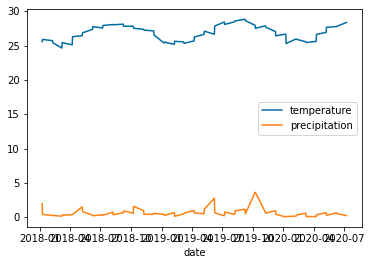

In [34]:
axe=df.plot()

In [35]:
meteo.describe()

,temperature,precipitation
count,61.000000,61.000000
mean,26.835295,0.694590
std,1.126366,0.716518
min,24.638000,0.051000
25%,25.668000,0.291000
50%,26.918000,0.505000
75%,27.808000,0.749000
max,28.825000,3.634000


In [36]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           122 non-null    object 
 1   temperature    61 non-null     float64
 2   precipitation  61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [37]:
# ------------- Plot the indexes ----------
#Initialize plot and parameters
sns.set(rc={'figure.figsize':(16,6)})
#sns.set_context('paper')

#Plot colors
prec_color = 'cornflowerblue'
temp_color = 'fuchsia'

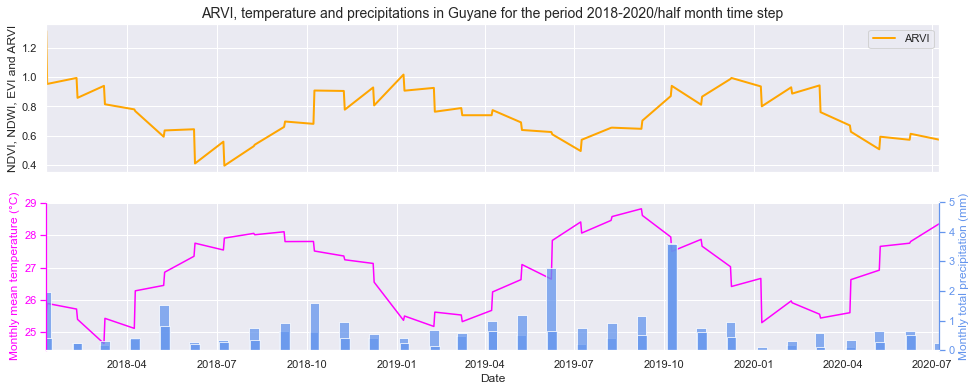

In [38]:
#Create the figure with a date x-axis
plt.style.use("tableau-colorblind10")
fig,ax = plt.subplots(2,1, sharex=True)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
#ax.set_xlim(dt.date(2017,12,1),dt.date(2020,2,1))
ax[1].set_xlim(df.index.min(),df.index.max())



#Plot precipitation
ax2 = ax[1].twinx()


p_prec = ax2.bar(meteo_precip['date'],meteo_precip['precipitation'], width = 10, alpha = .75, color = prec_color,label = 'precipation(mm)')
ax2.set_ylim(0,5)
ax2.grid(False)
ax2.set_ylabel('Monthly total precipitation (mm)',fontsize = 12)
ax2.spines['right'].set_color(prec_color)
ax2.tick_params(axis='y', colors = prec_color)
ax2.yaxis.label.set_color(prec_color)

#Plot temperature
p_temp = ax[1].plot(meteo_temp['date'],meteo_temp['temperature'],'-',color =temp_color,label = 'T (°C)')
ax2.spines['left'].set_color(temp_color)
ax[1].tick_params(axis='y',colors = temp_color)
ax[1].yaxis.label.set_color(temp_color)
ax[1].set_ylabel('Monthly mean temperature (°C)', fontsize = 12)
#ax[1].yaxis.tick_right()


#plot ARVI
ax[0].set_ylabel('NDVI, NDWI, EVI and ARVI',fontsize=12)
ax[0].set_title('ARVI, temperature and precipitations in Guyane for the period 2018-2020/half month time step',fontsize = 14)

ax[0].plot(indice['date'],indice['ARVI'],linewidth = 2, color = 'orange', label ='ARVI')
#ax.set_ylabel('ARVI')
ax[0].legend(loc = 'upper right')


ax[1].set_xlabel('Date',fontsize = 12)
plt.savefig('temp_prec_halfmonth.png',dpi=250,bbox_inches = 'tight')

arvi_list is 1.0054945054945055 behind temperature_list


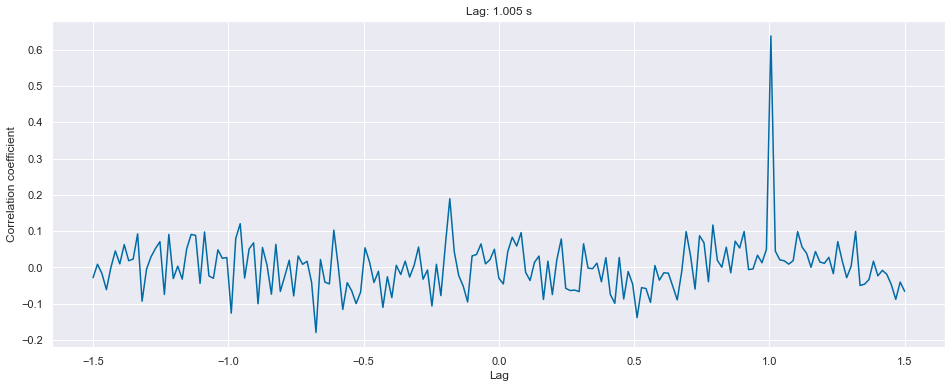

In [39]:
#crosscorellation
#fig1,ax1=plt.subplots(2, 4, figsize=(16,6), sharex= False, sharey= True )
#fig1.tight_layout(pad=3.0)
#fig1.suptitle("Correlation: Precipitation/Temperature versus indices", fontsize = 14, y=1.05)

#precipitation_list = list(meteo_precip["precipitation"])
temperature_list = list(meteo_temp["temperature"])
arvi_list = list(indice["ARVI"])
    
# Sine sample with some noise and copy to y1 and y2 with a 1-second lag
sr = 61
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 5, y.shape)
temperature_list = y[sr:4*sr]
arvi_list = y[:3*sr]

lag_finder(temperature_list, arvi_list, sr)

arvi_list is 1.0054945054945055 behind temperature_list


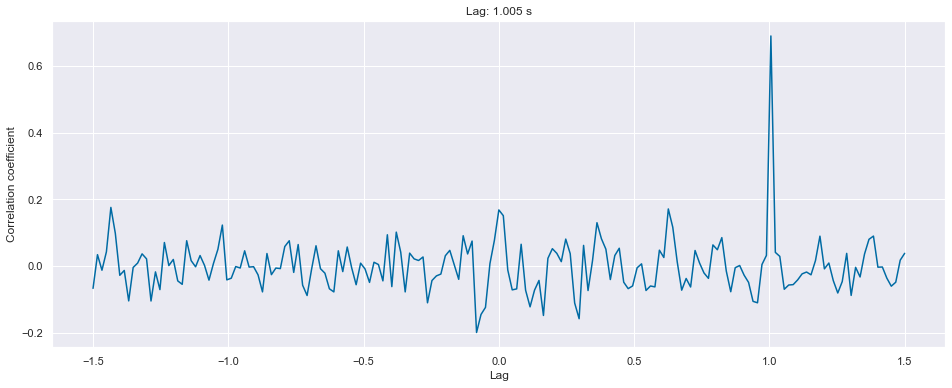

In [40]:
precipitation_list = list(meteo_precip["precipitation"])
#temperature_list = list(meteo_temp["temperature"])
arvi_list = list(indice["ARVI"])
    
# Sine sample with some noise and copy to y1 and y2 with a 1-second lag
sr = 61
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 5, y.shape)
precipitation_list = y[sr:4*sr]
arvi_list = y[:3*sr]

lag_finder(precipitation_list, arvi_list, sr)